In [0]:
# 1. Configurer l'accès au compte de stockage Azure
spark.conf.set(
    "fs.azure.account.key.crimestockage28.blob.core.windows.net",
    "<<Clé d'accées de votre compte de stockage d'azure>>"
)

In [0]:
# 2. Lire le fichier CSV depuis le conteneur Azure Blob
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("wasbs://crimesdatabrutes@crimestockage28.blob.core.windows.net/Crimes.csv")

In [0]:
from pyspark.sql.functions import col
from functools import reduce
from pyspark.sql.functions import sum
from pyspark.sql.functions import count
from pyspark.sql.functions import to_date

from pyspark.sql.functions import regexp_replace, to_timestamp

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Afficher les premiere lignes du dataframe
df.show(5)

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13311263|   JG503434|07/29/2022 03:39:...|     023XX S TROY ST|1582|OFFENSE INVOLVING...|   CHILD PORNOGRAPHY|           RE

In [0]:
df.columns

Out[12]: ['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
df.describe().show()

+-------+------------------+------------------+--------------------+--------------+------------------+-----------------+---------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+--------------------+
|summary|                ID|       Case Number|                Date|         Block|              IUCR|     Primary Type|    Description|Location Description|              Beat|          District|              Ward|    Community Area|          FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|         Longitude|            Location|
+-------+------------------+------------------+--------------------+--------------+------------------+-----------------+---------------+--------------------+------------------+------------------+------------------+----

In [0]:
df.describe().toPandas()

,summary,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,count,8351384,8351384,8351384,8351384,8351384,8351384,8351384,8336876,8351384,...,7736561,7737691,8351384,8258203,8258203,8351384,8351384,8258203,8258203,8258203
1,mean,7461291.005172796,277222.5,None,None,1116.7413059129221,None,None,None,1183.8912122828983,...,22.783190231421944,37.39181662850067,11.995833287827091,1164645.8226977468,1885900.3611313503,2010.8856600295233,None,41.84250493208478,-87.67132523044152,None
2,stddev,3750374.4633049886,155025.77649001902,None,None,811.0389897849515,None,None,None,703.6623734045777,...,13.857469617417479,21.547131117606742,7.277339448923567,16958.791392961044,32439.833212872483,6.983716046900714,None,0.08925331440194141,0.0614537287769165,None
3,min,634,01G050460,01/01/2001 01:00:00 AM,0000X E 100 PL,0110,ARSON,$300 AND UNDER,"""CTA """"L"""" PLATFORM""",111,...,1,0,01A,0,0,2001,01/01/2007 07:32:02 AM,36.619446395,-91.686565684,"(36.619446395, -91.686565684)"
4,max,13892302,ZZZ199957,12/31/2024 12:58:00 PM,XX S,9901,WEAPONS VIOLATION,WIREROOM/SPORTS,YMCA,2535,...,50,77,27,1205119,1951622,2025,12/31/2024 03:41:27 PM,42.022910333,-87.524529378,"(42.022910333, -87.677192004)"


In [0]:
df.select([
    sum(col(c).isNull().cast("int")).alias(c)
    for c in df.columns
]).show()

+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+------+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|  Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+------+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|          0|   0|    0|   0|           0|          0|               14508|     0|       0|   0|      47|614823|        613693|       0|       93181|       93181|   0|         0|   93181|    93181|   93181|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+------+--------------+--------+------------+---

Pour chaque colonne, il :

détecte les valeurs null,

les convertit en 1,

puis les additionne.

Le résultat est une seule ligne avec le nombre de valeurs nulles par colonne.

In [0]:
# Compter le nombre de doublons sur toutes les colonnes
df.groupBy(df.columns).count().filter("count > 1").selectExpr("sum(count - 1) as total_duplicates").show()

+----------------+
|total_duplicates|
+----------------+
|            null|
+----------------+



## Traitement de données

In [0]:
# Supprimer les lignes avec des valeurs manquantes dans les colonnes spécifiques
df_clean = df.dropna(how='any', subset=['District', 'Location Description', 'Ward', 'Community Area','X Coordinate', 'Y Coordinate','Latitude', 'Longitude','Location'])

In [0]:
df_clean.select([
    sum(col(c).isNull().cast("int")).alias(c)
    for c in df_clean.columns
]).show()


+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|          0|   0|    0|   0|           0|          0|                   0|     0|       0|   0|       0|   0|             0|       0|           0|           0|   0|         0|       0|        0|       0|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+

### On peut constater qu'il n'y a plus de valeurs manquantes 

## Renommer le noms des colonnes pour une compréhension plus claire pour le public francophone

In [0]:
# Dictionnaire des anciens noms vers nouveaux noms en français
renommage = {
    "ID": "ID",
    "Case Number": "Numéro de dossier",
    "Date": "Date",
    "Block": "Rue",
    "IUCR": "Code d’infraction (IUCR)",
    "Primary Type": "Type principal d’infraction",
    "Description": "Description",
    "Location Description": "Description du lieu",
    "Arrest": "Arrestation (Oui / Non)",
    "Domestic": "Violence domestique (Oui / Non)",
    "Beat": "Secteur de patrouille",
    "District": "District de police",
    "Ward": "Circonscription électorale",
    "Community Area": "Zone communautaire",
    "FBI Code": "Code FBI",
    "X Coordinate": "Coordonnée X",
    "Y Coordinate": "Coordonnée Y",
    "Year": "Année",
    "Updated On": "Date de mise à jour",
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "Location": "Coordonnées GPS (lat, long)"
}

In [0]:
# Renommage des colonnes
for ancien, nouveau in renommage.items():
    df_clean = df_clean.withColumnRenamed(ancien, nouveau)

# Vérifier le résultat
df_clean.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Numéro de dossier: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Rue: string (nullable = true)
 |-- Code d’infraction (IUCR): string (nullable = true)
 |-- Type principal d’infraction: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Description du lieu: string (nullable = true)
 |-- Arrestation (Oui / Non): boolean (nullable = true)
 |-- Violence domestique (Oui / Non): boolean (nullable = true)
 |-- Secteur de patrouille: integer (nullable = true)
 |-- District de police: integer (nullable = true)
 |-- Circonscription électorale: integer (nullable = true)
 |-- Zone communautaire: integer (nullable = true)
 |-- Code FBI: string (nullable = true)
 |-- Coordonnée X: integer (nullable = true)
 |-- Coordonnée Y: integer (nullable = true)
 |-- Année: integer (nullable = true)
 |-- Date de mise à jour: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = tr

### Reconvertion des bonnes données des colonnes DATE

In [0]:
df_clean.select("Date").show(15)

+--------------------+
|                Date|
+--------------------+
|08/10/2020 09:45:...|
|09/06/2023 05:00:...|
|09/06/2023 11:00:...|
|05/21/2019 08:20:...|
|07/07/2021 10:30:...|
|06/14/2022 02:47:...|
|09/21/2022 10:00:...|
|02/22/2023 01:50:...|
|05/03/2023 08:10:...|
|12/25/2022 12:01:...|
|06/23/2023 04:44:...|
|02/10/2024 12:44:...|
|02/22/2024 12:49:...|
|03/13/2023 06:40:...|
|06/05/2023 09:15:...|
+--------------------+
only showing top 15 rows



In [0]:
from pyspark.sql.functions import to_timestamp

# Repartir de la colonne Date en string 
df_clean = df_clean.withColumn("Date", to_timestamp(col("Date"), "MM/dd/yyyy hh:mm:ss a"))



In [0]:
# Repartir de la colonne Date en string (par exemple depuis df_raw)
df_clean = df_clean.withColumn("Date de mise à jour", to_timestamp(col("Date de mise à jour"), "MM/dd/yyyy hh:mm:ss a"))

In [0]:
df_clean.select("Date", "Date de mise à jour").show(15)

+-------------------+-------------------+
|               Date|Date de mise à jour|
+-------------------+-------------------+
|2020-08-10 09:45:00|2025-05-17 15:40:52|
|2023-09-06 17:00:00|2023-11-04 15:40:18|
|2023-09-06 11:00:00|2023-11-04 15:40:18|
|2019-05-21 08:20:00|2024-01-19 15:40:50|
|2021-07-07 10:30:00|2024-01-19 15:40:50|
|2022-06-14 14:47:00|2024-01-19 15:40:50|
|2022-09-21 22:00:00|2024-01-19 15:40:50|
|2023-02-22 13:50:00|2024-01-19 15:40:50|
|2023-05-03 08:10:00|2024-01-19 15:40:50|
|2022-12-25 00:01:00|2024-01-19 15:40:50|
|2023-06-23 04:44:00|2025-05-17 15:40:52|
|2024-02-10 00:44:00|2025-05-17 15:40:52|
|2024-02-22 00:49:00|2025-05-17 15:40:52|
|2023-03-13 18:40:00|2024-01-19 15:40:50|
|2023-06-05 21:15:00|2024-01-19 15:40:50|
+-------------------+-------------------+
only showing top 15 rows



## Visualation pour la distribution et la compréhension globale 

+---------------------------+-------+
|Type principal d’infraction|  count|
+---------------------------+-------+
|                      THEFT|1628315|
|                    BATTERY|1398136|
|            CRIMINAL DAMAGE| 874259|
|                  NARCOTICS| 682758|
|                    ASSAULT| 515960|
|              OTHER OFFENSE| 476630|
|                   BURGLARY| 407990|
|        MOTOR VEHICLE THEFT| 389507|
|         DECEPTIVE PRACTICE| 335672|
|                    ROBBERY| 288375|
+---------------------------+-------+
only showing top 10 rows



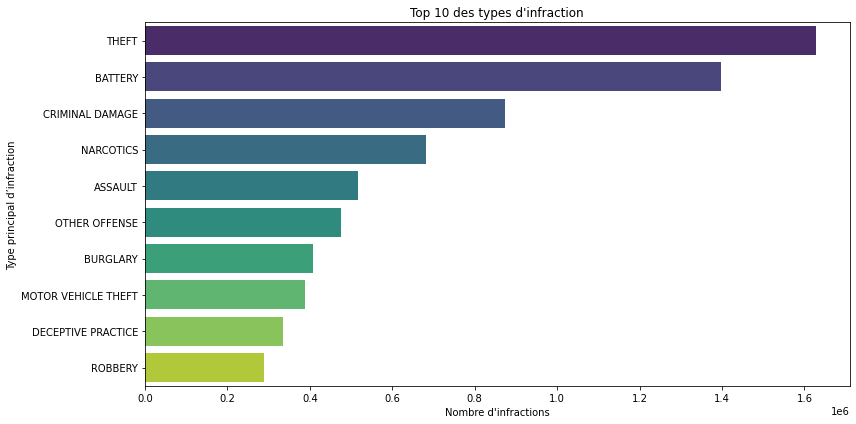

In [0]:
# Compter le nombre d'occurrences de chaque type d'infraction
type_infraction = df_clean.groupBy("Type principal d’infraction").count().orderBy("count", ascending=False)

# Afficher les 10 types les plus fréquents
type_infraction.show(10)

# Pour visualiser avec matplotlib/seaborn, convertir en Pandas
type_infraction_pd = type_infraction.toPandas()

# Afficher un graphique des 10 types les plus fréquents

plt.figure(figsize=(12,6))
sns.barplot(
    data=type_infraction_pd.head(10),
    x="count",
    y="Type principal d’infraction",
    palette="viridis"
)
plt.xlabel("Nombre d'infractions")
plt.ylabel("Type principal d’infraction")
plt.title("Top 10 des types d'infraction")
plt.tight_layout()
plt.show()

In [0]:
# Analyse du graphique "Top 10 des types d'infraction"
# Le graphique montre les 10 types d'infraction les plus fréquents dans le jeu de données.
# Chaque barre représente le nombre d'occurrences d'un type d'infraction spécifique.
# Les types d'infraction sont classés par ordre décroissant de fréquence.

# Extraire les données du graphique pour analyse
top_10_types = type_infraction_pd.head(10)

# Afficher les données des 10 types d'infraction les plus fréquents
display(top_10_types)

# Analyser les données
# Calculer le pourcentage de chaque type d'infraction par rapport au total des infractions
total_infractions = type_infraction_pd['count'].sum()
top_10_types['percentage'] = (top_10_types['count'] / total_infractions) * 100

# Afficher les pourcentages
display(top_10_types[['Type principal d’infraction', 'count', 'percentage']])

Type principal d’infraction,count
THEFT,1628315
BATTERY,1398136
CRIMINAL DAMAGE,874259
NARCOTICS,682758
ASSAULT,515960
OTHER OFFENSE,476630
BURGLARY,407990
MOTOR VEHICLE THEFT,389507
DECEPTIVE PRACTICE,335672
ROBBERY,288375


<command-8852690609030150>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_types['percentage'] = (top_10_types['count'] / total_infractions) * 100


Type principal d’infraction,count,percentage
THEFT,1628315,21.30790296991456
BATTERY,1398136,18.295812681664458
CRIMINAL DAMAGE,874259,11.440431330900061
NARCOTICS,682758,8.934475955778167
ASSAULT,515960,6.75178059304073
OTHER OFFENSE,476630,6.237113698854568
BURGLARY,407990,5.338900232875974
MOTOR VEHICLE THEFT,389507,5.097034272915566
DECEPTIVE PRACTICE,335672,4.392556971910939
ROBBERY,288375,3.7736350269751933


+-----+------+
|Année| count|
+-----+------+
| 2001|  3900|
| 2002|345046|
| 2003|471995|
| 2004|467138|
| 2005|449877|
| 2006|445514|
| 2007|435547|
| 2008|419656|
| 2009|385765|
| 2010|369778|
| 2011|350891|
| 2012|335099|
| 2013|306340|
| 2014|273616|
| 2015|257783|
| 2016|266478|
| 2017|264152|
| 2018|262894|
| 2019|258163|
| 2020|206924|
+-----+------+
only showing top 20 rows



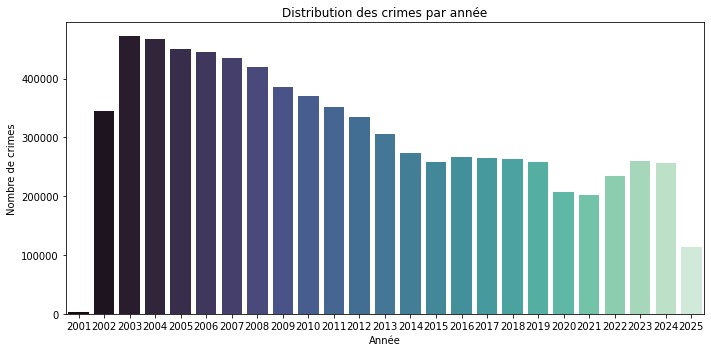

In [0]:
# Distribution des crimes par année
crimes_par_annee = df_clean.groupBy("Année").count().orderBy("Année")
crimes_par_annee.show()

# Visualisation
crimes_par_annee_pd = crimes_par_annee.toPandas()

plt.figure(figsize=(10,5))
sns.barplot(data=crimes_par_annee_pd, x="Année", y="count", palette="mako")
plt.xlabel("Année")
plt.ylabel("Nombre de crimes")
plt.title("Distribution des crimes par année")
plt.tight_layout()
plt.show()

In [0]:
# Secteur de patrouille
secteur_counts = df_clean.groupBy("Secteur de patrouille").count().orderBy("count", ascending=False)
secteur_counts.show(10)

# District de police
district_counts = df_clean.groupBy("District de police").count().orderBy("count", ascending=False)
district_counts.show(10)

# Zone communautaire
zone_counts = df_clean.groupBy("Zone communautaire").count().orderBy("count", ascending=False)
zone_counts.show(10)

+---------------------+-----+
|Secteur de patrouille|count|
+---------------------+-----+
|                  421|59941|
|                  423|58931|
|                 1834|57559|
|                  624|54764|
|                  511|52972|
|                 1533|51974|
|                  823|51054|
|                 1112|50582|
|                  414|48212|
|                 1522|47567|
+---------------------+-----+
only showing top 10 rows

+------------------+------+
|District de police| count|
+------------------+------+
|                 8|515807|
|                11|487497|
|                 6|451391|
|                 4|436896|
|                 7|435885|
|                25|431904|
|                 3|389097|
|                12|383042|
|                 9|370512|
|                 2|350238|
+------------------+------+
only showing top 10 rows

+------------------+------+
|Zone communautaire| count|
+------------------+------+
|                25|471445|
|                 8|2733

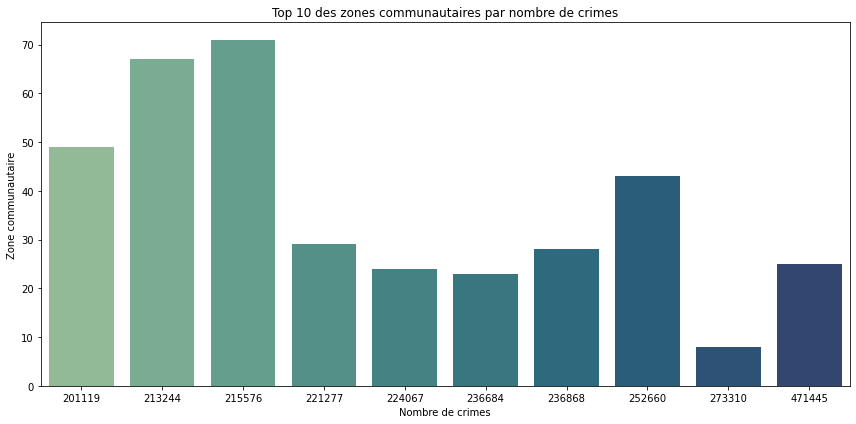

In [0]:
zone_counts_pd = zone_counts.toPandas()
plt.figure(figsize=(12,6))
sns.barplot(
    data=zone_counts_pd.head(10),
    x="count",
    y="Zone communautaire",
    palette="crest"
)
plt.xlabel("Nombre de crimes")
plt.ylabel("Zone communautaire")
plt.title("Top 10 des zones communautaires par nombre de crimes")
plt.tight_layout()
plt.show()

+-----------------------+-------+
|Arrestation (Oui / Non)|  count|
+-----------------------+-------+
|                   true|1912149|
|                  false|5729687|
+-----------------------+-------+



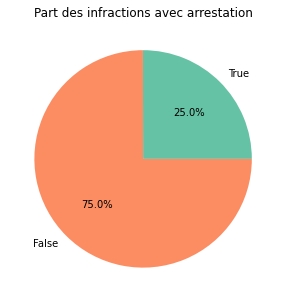

+-------------------------------+-------+
|Violence domestique (Oui / Non)|  count|
+-------------------------------+-------+
|                           true|1329351|
|                          false|6312485|
+-------------------------------+-------+



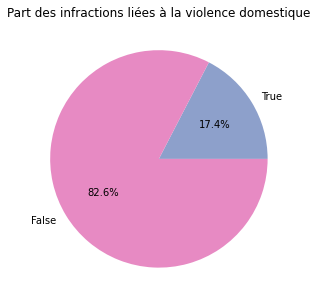

In [0]:
# Part des arrestations
arrest_counts = df_clean.groupBy("Arrestation (Oui / Non)").count()
arrest_counts.show()

# Visualisation
arrest_counts_pd = arrest_counts.toPandas()
plt.figure(figsize=(5,5))
plt.pie(arrest_counts_pd["count"], labels=arrest_counts_pd["Arrestation (Oui / Non)"], autopct='%1.1f%%', colors=["#66c2a5", "#fc8d62"])
plt.title("Part des infractions avec arrestation")
plt.show()

# Part des violences domestiques
domestic_counts = df_clean.groupBy("Violence domestique (Oui / Non)").count()
domestic_counts.show()

# Visualisation
domestic_counts_pd = domestic_counts.toPandas()
plt.figure(figsize=(5,5))
plt.pie(domestic_counts_pd["count"], labels=domestic_counts_pd["Violence domestique (Oui / Non)"], autopct='%1.1f%%', colors=["#8da0cb", "#e78ac3"])
plt.title("Part des infractions liées à la violence domestique")
plt.show()

+--------------------+-------+
| Description du lieu|  count|
+--------------------+-------+
|              STREET|1979369|
|           RESIDENCE|1232684|
|           APARTMENT| 938378|
|            SIDEWALK| 716373|
|               OTHER| 239110|
|PARKING LOT/GARAG...| 181688|
|               ALLEY| 171469|
|  SMALL RETAIL STORE| 156276|
|SCHOOL, PUBLIC, B...| 131365|
|          RESTAURANT| 130300|
+--------------------+-------+
only showing top 10 rows



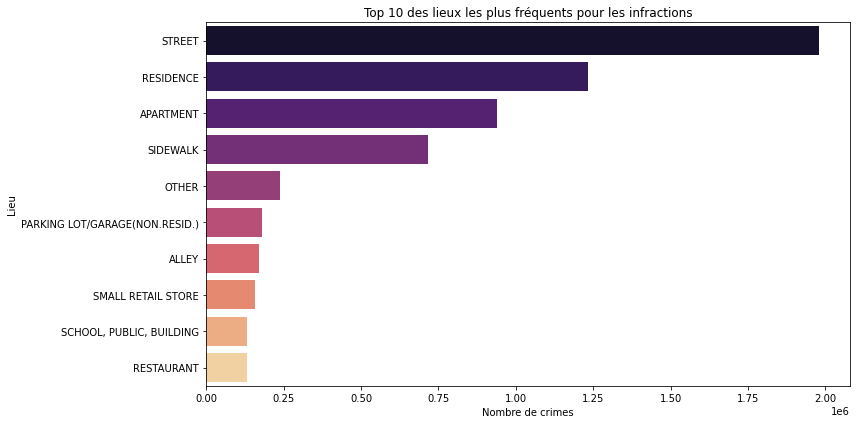

In [0]:
# Compter les lieux les plus fréquents
lieux_counts = df_clean.groupBy("Description du lieu").count().orderBy("count", ascending=False)
lieux_counts.show(10)

# Visualisation des 10 lieux les plus fréquents
lieux_counts_pd = lieux_counts.toPandas()
plt.figure(figsize=(12,6))
sns.barplot(
    data=lieux_counts_pd.head(10),
    x="count",
    y="Description du lieu",
    palette="magma"
)
plt.xlabel("Nombre de crimes")
plt.ylabel("Lieu")
plt.title("Top 10 des lieux les plus fréquents pour les infractions")
plt.tight_layout()
plt.show()